In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys


sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool")




# needed for querying dataframe localisations, Transforming and mapping to EpiNav gif parcellations
from mega_analysis.crosstab.mega_analysis.MEGA_ANALYSIS import *
from mega_analysis.crosstab.mega_analysis.QUERY_SEMIOLOGY import *
from mega_analysis.crosstab.mega_analysis.QUERY_INTERSECTION_TERMS import QUERY_INTERSECTION_TERMS
from mega_analysis.crosstab.mega_analysis.melt_then_pivot_query import *
from mega_analysis.crosstab.mega_analysis.pivot_result_to_pixel_intensities import *

# needed to collate lateralisation data
from mega_analysis.crosstab.mega_analysis.QUERY_LATERALISATION import *
from mega_analysis.crosstab.mega_analysis.lateralised_intensities import lateralisation_to_pixel_intensities

# mapping to gif
from mega_analysis.crosstab.mega_analysis.mapping import mapping, big_map, pivot_result_to_one_map





post_op = 'Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)'
concordant = 'Concordant Neurophys & Imaging (MRI, PET, SPECT)'
    # sEEG_ES = 'sEEG and/or ES'
sEEG_ES = 'sEEG (y) and/or ES (ES)' # March 2020

In [2]:


# filename = r'D:\Ali USB Backup\1 PhD\Mega Analysis\4. SystReview Single Table (NEW CROSSTAB) March 2020.xlsx'


# 25th March 2020:
filename = r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool\resources\syst_review_single_table.xlsx"

In [3]:
# test df:
test = pd.DataFrame({"sz free": ['semio', 'semio2', 'semio3', 'semio4'],
                   "concordant": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "ES": [np.nan, 22, 7, np.nan],
                     'ESfsdf': [ 1,435,356, np.nan],
                     'asdwe': [13,53,56, np.nan]
                    
                    })
test

,sz free,concordant,ES,ESfsdf,asdwe
0,semio,NaN,NaN,1.0,13.0
1,semio2,Batmobile,22.0,435.0,53.0
2,semio3,Bullwhip,7.0,356.0,56.0
3,semio4,NaN,NaN,NaN,NaN


In [4]:
test[['concordant', 'ES', 'ESfsdf', 'asdwe']].dropna(thresh=1, axis=0)

,concordant,ES,ESfsdf,asdwe
0,NaN,NaN,1.0,13.0
1,Batmobile,22.0,435.0,53.0
2,Bullwhip,7.0,356.0,56.0


In [5]:
test.dropna(subset=['concordant', 'ES', 'ESfsdf', 'asdwe'], thresh=1, axis=0, inplace=True)

In [6]:
test

,sz free,concordant,ES,ESfsdf,asdwe
0,semio,NaN,NaN,1.0,13.0
1,semio2,Batmobile,22.0,435.0,53.0
2,semio3,Bullwhip,7.0,356.0,56.0


# 1. MEGA ANALYSIS


0. DataFrame pre-processing and cleaning:
df.shape to begin with: (1045, 111)
Removing empty rows and columns:
	 15 empty anatomical labels=columns
	 113 empty rows=empty lines
df.shape after dropna: (932, 96)


THESE ARE THE REMOVED EMPTY LABELS:

Planum Temporale
Planum Polare
Ant Mesial Temporal
Post Mesial Temporal
Fusiform
OTMG (fusiform)
Ant OF
Pars orbitalis (subgroup of IFG)
(BA 47)
Pars Triangularis (subgroup IFG)
Ventro-lateral premotor
Dorso-lateral premotor
Ventr Ant Cing
(BA 24)
Posterior Occipital Gyrus
Insular pole
Vermis
1. No Exclusions.

2. Checking for missing values for columns

	 missing Reported Semiology  descriptions:
0       Afif A, Minotti L, Kahane P, et al. Middle sho...
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6

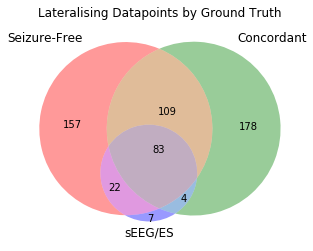

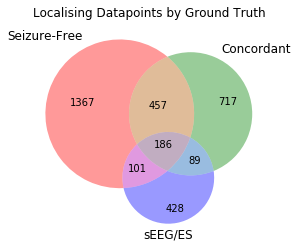

6. Venn diagrams by patient selection priors (study type)


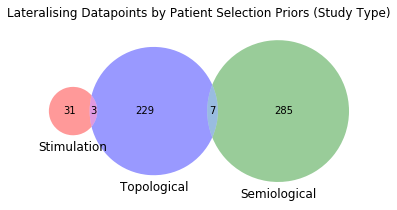

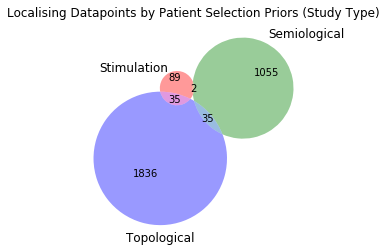

Other criteria:  ['LGi1' 'NMDA-R Abs' 'POLG1' 'anti-GAD Abs' 'anti-Glycine R antibidoes'
 'anti-GAD antibodies' 'presumed ADNFLE' 'VGKC-Abs']
Lateralising Other Total/Exclusives:  9.0 / 7.0
Localising Other Total/Exclusives:  49.0 / 38.0


In [7]:
df, df_ground_truth, df_study_type = MEGA_ANALYSIS(
    excel_data = filename,
    n_rows = 1045,
    usecols = "A:DG",
    header = 1,
    plot=True,
    exclude_data=False, 
                        POST_ictals=True, 
    PET_hypermetabolism=True, SPECT_PET=False, CONCORDANCE=False
)

In [4]:
df.shape

(932, 96)

In [5]:
# returns the following preprocessed DataFrame

In [6]:
df.tail()

,"Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)","Concordant Neurophys & Imaging (MRI, PET, SPECT)",sEEG (y) and/or ES (ES),Reference,Relevant Tot Sample,Tot Pt included,Reported Semiology,Semiology Category,Ground truth description,Lateralising,...,Cerebellum,Hemisphere,padeiatric? <7 years (0-6 yrs) y/n,# tot pt in the paper,# pt excluded,# pt sz free post-surg,Cortical Stimulation (CS),Spontaneous Semiology (SS),Epilepsy Topology (ET),Other (e.g. Abs)
1040,y,NaN,NaN,"Leung H, Schindler K, Clusmann H, Bien CG, Pop...",NaN,NaN,facial expression of fear,Fear,"post-op sz freedom Engel class I, minimum f/u 1 y",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,y,NaN,NaN,"Leung H, Schindler K, Clusmann H, Bien CG, Pop...",NaN,NaN,ictal body turning along an axis that produced...,Turning (Sitting),"post-op sz freedom Engel class I, minimum f/u 1 y",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,y,NaN,NaN,"Leung H, Schindler K, Clusmann H, Bien CG, Pop...",NaN,NaN,grimacing produced by bilateral facial contrac...,Tonic (Face),"post-op sz freedom Engel class I, minimum f/u 1 y",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,y,NaN,NaN,"Leung H, Schindler K, Clusmann H, Bien CG, Pop...",NaN,NaN,barking,Vocalisation,"post-op sz freedom Engel class I, minimum f/u 1 y",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,y,NaN,NaN,"Leung H, Schindler K, Clusmann H, Bien CG, Pop...",NaN,NaN,bimanual bipedal automatism,Automatism (manual/pedal),"post-op sz freedom Engel class I, minimum f/u 1 y",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# also returns the DataFrames used for the Venn Diagrams
df_ground_truth
df_study_type

Lateralising Datapoints        \
                                                  Exclusive Total   
Cortical Stimulation                                     31    34   
Semiological                                            285   292   
Topological                                             229   239   
OTHER                                                     7     9   
Cortical Stimulation & Semiological                       0   NaN   
Cortical Stimulation & Topological                        3   NaN   
Semiological & Topological                                7   NaN   
CES, SS, ET                                               0   NaN   

                                    Localising Datapoints          
                                                Exclusive   Total  
Cortical Stimulation                                   89     126  
Semiological                                         1055    1092  
Topological                                        1836.5  1906.5  
OTHER                                                  38      49  
Cortical Stimulation & Semiological                     2     NaN  
Cortical Stimulation & Topological                     35     NaN  
Semiological & Topological                             35     NaN  
CES, SS, ET                                             0     NaN

# EXCLUSIONS

In [5]:
# let's say we want to further preprocess the DataFrame and filter by more strict ground truth criteria in a flexible manner
df[concordant].unique()

array([nan, 'y', 'SPECT', 'PET', 'PET hypermetabolism',
       'Surgical finding, PET hypometabolism', 'PET+ictal SPECT',
       'fMRI+DTI', 'PET, SPECT', 'PET (interictal hypometabolism)',
       'CT/MRI (SPECT)'], dtype=object)


0. DataFrame pre-processing and cleaning:
df.shape to begin with: (1097, 111)
Removing empty rows and columns:
	 15 empty anatomical labels=columns
	 115 empty rows=empty lines
df.shape after dropna: (982, 96)


THESE ARE THE REMOVED EMPTY LABELS:

Planum Temporale
Planum Polare
Ant Mesial Temporal
Post Mesial Temporal
Fusiform
OTMG (fusiform)
Ant OF
Pars orbitalis (subgroup of IFG)
(BA 47)
Pars Triangularis (subgroup IFG)
Ventro-lateral premotor
Dorso-lateral premotor
Ventr Ant Cing
(BA 24)
Posterior Occipital Gyrus
Insular pole
Vermis


1. Excluding some data based on ground truths

Localising Datapoints relevant to query ['(?i)post-ictal', '(?i)postictal', '(?i)post ictal', '(?i)post_ictal']:  120.0
Lateralising Datapoints relevant to query:  106.0
Excluded post-ictal semiology in the query

Localising Datapoints relevant to query ['(?i)PET']:  76.0
Lateralising Datapoints relevant to query:  11.0

Localising Datapoints relevant to query ['(?i)Hyper']:  7.0
Lateralising Datapoints 

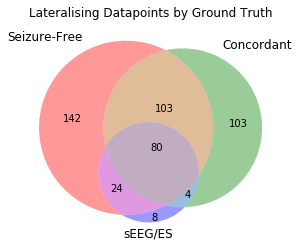

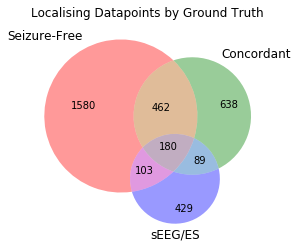

6. Venn diagrams by patient selection priors (study type)


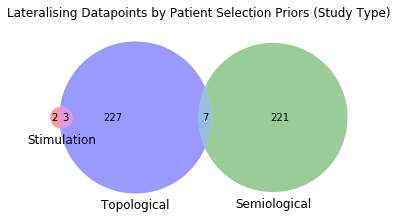

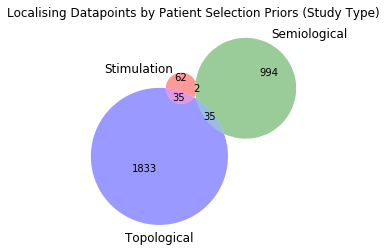

Other criteria:  ['LGi1' 'NMDA-R Abs' 'POLG1' 'anti-GAD Abs' 'anti-Glycine R antibidoes'
 'anti-GAD antibodies' 'presumed ADNFLE' 'VGKC-Abs']
Lateralising Other Total/Exclusives:  9.0 / 7.0
Localising Other Total/Exclusives:  48.0 / 37.0


In [7]:
df_exclusions, df_ground_truth, df_study_type = MEGA_ANALYSIS(
    excel_data = filename,
    exclude_data=True, 
                        POST_ictals=True, 
    PET_hypermetabolism=True, SPECT_PET=False, CONCORDANCE=False
)


In [ ]:
# so concretely, what has happened:

In [11]:
# without exclusions
df.loc[[7,8,23,33, 461, 515, 520]][concordant].fillna(0)

7                        y
8                        y
23                       0
33                       0
461                    PET
515    PET hypermetabolism
520                      0
Name: Concordant Neurophys & Imaging (MRI, PET, SPECT), dtype: object

In [12]:
# with exclusions:
df_exclusions.loc[[7,8,23,33, 461, 515, 520]][concordant].fillna(0)

7        y
8        y
23       0
33       0
461    PET
515      0
520      0
Name: Concordant Neurophys & Imaging (MRI, PET, SPECT), dtype: object

In [9]:
print('df.shape', df.shape)
print('df_exclusions.shape', df_exclusions.shape)

df.shape (897, 96)
df_exclusions.shape (947, 96)


In [12]:
# try exclusions separately using df:

In [13]:
df_exclusions_postictal_PEThyper = exclusions(df, 
                POST_ictals=True,
                PET_hypermetabolism=True,
                SPECT_PET=False,
                CONCORDANCE=False)


Localising Datapoints relevant to query ['(?i)post-ictal', '(?i)postictal', '(?i)post ictal', '(?i)post_ictal']:  120.0
Lateralising Datapoints relevant to query:  106.0
Excluded post-ictal semiology in the query

Localising Datapoints relevant to query ['(?i)PET']:  73.0
Lateralising Datapoints relevant to query:  10.0

Localising Datapoints relevant to query ['(?i)Hyper']:  7.0
Lateralising Datapoints relevant to query:  2.0
Excluded cases where PET hypermetabolism was the only grund truth criteria from the query, converted rest to nulls


In [6]:
df_exclusions_postictal_PEThyper.shape

(897, 96)

In [15]:
df_exclusions.loc[[i for i in df_exclusions.index if i not in df_exclusions2.index]][concordant].fillna(0)

1045      0
1046      0
1047      0
1048      0
1049      0
1050      0
1051      0
1052      0
1053      0
1054      0
1055      0
1056      0
1057      0
1058      0
1059      0
1060      0
1061      0
1062      0
1063      0
1064      0
1065      0
1066      0
1067      0
1069      0
1070      0
1071      0
1072    PET
1073      y
1074      y
1075      y
1076      y
1077      y
1078      y
1079      y
1080      y
1081      y
1082      y
1083    PET
1084      y
1085      y
1086      y
1087      y
1088      y
1089      y
1090      y
1091      y
1092      y
1093      y
1094      y
1096      y
Name: Concordant Neurophys & Imaging (MRI, PET, SPECT), dtype: object

In [ ]:
# weird why is above showing running elclusions sepsrately excludes more data??

In [17]:
# test the 'PET hypermetabolism' exl
df_exclusions_pet_hyper = exclusions(df, 
                POST_ictals=True,
                PET_hypermetabolism=True,
                SPECT_PET=False,
                CONCORDANCE=False)
# because of in place = true

QUERY SEMIOLOGY ERROR: This semiology was not found within the reported literature nor in the semiology categories


AttributeError: 'NoneType' object has no attribute 'index'

In [17]:
print(df_exclusions2.shape, df_exclusions.shape)

(897, 96) (948, 96)


In [8]:
concordant = 'Concordant Neurophys & Imaging (MRI, PET, SPECT)'
col1 = concordant

QUERY_SEMIOLOGY(df, semiology_term='PET hypermetabolism', 
                ignore_case=True, use_semiology_dictionary=False,
                col1=col1, col2=col1)  


# 8 PET hypers


Localising Datapoints relevant to query (?i)PET hypermetabolism:  8.0
Lateralising Datapoints relevant to query:  2.0


,"Concordant Neurophys & Imaging (MRI, PET, SPECT)",Reference,Relevant Tot Sample,Tot Pt included,Reported Semiology,Semiology Category,Ground truth description,Lateralising,IL,Localising,Reported Localisation,TL,Mesial Temporal,HIPPOCAMPUS,# tot pt in the paper,# pt excluded,# pt sz free post-surg,Spontaneous Semiology (SS),Other (e.g. Abs)
488,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",1.0,1.0,bad taste,Aura (Gustatory),FDG-PET and scalp EEG concordant,NaN,NaN,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,1.0,0.0,0,NaN,NMDA-R Abs
489,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,"at the same time a tinnitus ""sound of flowing ...",Auditory,FDG-PET and scalp EEG concordant,NaN,NaN,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
490,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,painful numbness of the left arm,Pain,FDG-PET and scalp EEG concordant,1.0,1.0,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
491,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,painful numbness of the left arm,Somatosensory,FDG-PET and scalp EEG concordant,1.0,1.0,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
492,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,naming difficulties,Speech (Dysphasia),FDG-PET and scalp EEG concordant,NaN,NaN,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
493,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,and drooling.,Autonomic (Drooling),FDG-PET and scalp EEG concordant,NaN,NaN,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
494,PET hypermetabolism,"De Maeseneire C, Tahry RE, Santos SF. A case o...",NaN,NaN,prolonged post ictal reduction in fluency,Postictal (Dysphasia),FDG-PET and scalp EEG concordant,NaN,NaN,1.0,"EEG sharp rhythmic temporal theta, diffusing t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NMDA-R Abs
515,PET hypermetabolism,"Dimitriadis K, Pfefferkorn T, Noachtar S. Seve...",1.0,1.0,"ictal depression (depressed mood, loss of inte...",Aura (Psychic/ Affective),MRI-PET-EEG concordance,NaN,NaN,1.0,left temporal EEG seizure pattern (max. at ele...,1.0,1.0,1.0,1.0,1.0,0,y,NaN


In [16]:
df_exclusions_concordance = exclusions(df, 
                POST_ictals=False,
                PET_hypermetabolism=False,
                SPECT_PET=False,
                CONCORDANCE=True)


Entirely replaced concordant column with nans


In [17]:
df_exclusions_postictals_concordance.shape

(664, 96)

In [20]:
# exclude the ET topology:

df_exclusions_ET = exclusions(df, 
                POST_ictals=False,
                PET_hypermetabolism=False,
                SPECT_PET=False,
                CONCORDANCE=False,
                'ET'=True)

df_exclusions_ET.shape

SyntaxError: keyword can't be an expression (<ipython-input-20-75093c0f8c1e>, line 8)

In [33]:
df_exclusions_ET = df.dropna(subset=['Epilepsy Topology (ET)'], axis=0)
df_exclusions_ET.shape

(448, 96)

In [34]:
# exclude ET in already excluded concordance:

df_exclusions_ET_conc = df_exclusions_concordance.dropna(subset=['Epilepsy Topology (ET)'], axis=0)
df_exclusions_ET_conc.shape


(328, 96)

In [38]:
df.dropna(subset=['Epilepsy Topology (ET)'], axis=0, inplace=False).shape

(448, 96)

# pickle



In [36]:
# have to run MEGA_ANALYSIS AGAIN TO GET df to be correct

df.shape, df_exclusions_postictal_PEThyper.shape, df_exclusions_concordance.shape, df_exclusions_ET.shape, df_exclusions_ET_conc.shape

((932, 96), (897, 96), (664, 96), (448, 96), (328, 96))

In [32]:
# pickle this df and upload it to resources so the above isn't repeated for each semiology:

import pickle
path_to_file = r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool\resources\DataFrames_Exclusions_df_postictalPEThyper_concordance_ET.pickle"
data = (df,  # entire DataFrame
             df_exclusions_postictal_PEThyper,
             df_exclusions_concordance,
             df_exclusions_ET)

with open(path_to_file, 'wb') as f:
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

In [37]:
path_to_file2 = r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool\resources\DataFrames_Exclusions_dfETconc.pickle"


with open(path_to_file2, 'wb') as f:
    pickle.dump(df_exclusions_ET_conc, f, pickle.HIGHEST_PROTOCOL)

In [9]:
# for loading

import pickle

path_to_file = r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool\resources\DataFrames_Exclusions_df_postictalPEThyper_concordance_ET.pickle"
with open(path_to_file, 'rb') as f:
        data = pickle.load(f)       
        
(df, 
 df_exclusions_postictal_PEThyper,
             df_exclusions_concordance,
             df_exclusions_ET) = data



path_to_file2 = r"C:\Users\ali_m\AnacondaProjects\PhD\Semiology-Visualisation-Tool\resources\DataFrames_Exclusions_dfETconc.pickle"
with open(path_to_file2, 'rb') as f:
        data = pickle.load(f)
df_exclusions_ET_conc = data      



# 2. QUERY BY SEMIOLOGY

We want to find all the instances of (lateralisations - later) and localisations for a specific semiology.

We will search in reported semiology and semiology category: (for demo we will search the whole database df without exclusions)

In [ ]:
df = df
# df = df_exclusions
df[['Reported Semiology', 'Semiology Category']]

In [10]:

semiology_term='star'  # stares or staring or stare - note stars in central visual field
semiology_term=['star', 'blank', 'unresponsive']  # bulid your own OR list
semiology_term='dialeptic'

In [11]:

inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, ignore_case=True, use_semiology_dictionary=False)
inspect_result


Localising Datapoints relevant to query (?i)dialeptic:  86.0
Lateralising Datapoints relevant to query: 0


,"Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)","Concordant Neurophys & Imaging (MRI, PET, SPECT)",sEEG (y) and/or ES (ES),Reference,Relevant Tot Sample,Tot Pt included,Reported Semiology,Semiology Category,Ground truth description,Localising,...,Lateral Occipital,INSULA,Cerebellum,Hemisphere,padeiatric? <7 years (0-6 yrs) y/n,# tot pt in the paper,# pt excluded,# pt sz free post-surg,Spontaneous Semiology (SS),Epilepsy Topology (ET)
32,y,NaN,NaN,"Alkawadri R, So NK, Van Ness PC, et al. Cingul...",NaN,NaN,dialaptic,Dialeptic,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
168,NaN,NaN,NaN,"Aljaafari D, Nascimento FA, Abraham A, Andrade...",NaN,NaN,blank stare,Dialeptic,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
169,NaN,NaN,NaN,"Aljaafari D, Nascimento FA, Abraham A, Andrade...",NaN,NaN,unresponsiveness,Dialeptic,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
200,y,y,y,"Badier JM, Bartolomei F, Chauvel P, Benar CG, ...",15.0,1.0,loss of contact,Dialeptic,Class 1 and sEEG,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
204,y,NaN,NaN,"Barba C, Doglietto F, De Luca L, Faraca G, Mar...",NaN,NaN,loss of contact,Dialeptic,"7 Ia, 2 Ib, 2 sEEG",8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
216,y,NaN,NaN,"Barba C, Doglietto F, Policicchio D, Caulo M, ...",NaN,NaN,loss of contact,Dialeptic,Seizure-Freedom,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
245,NaN,y,NaN,"Battaglia G, Granata T, Farina L, D'Incerti L,...",NaN,NaN,loss of contact,Dialeptic,Concordant MRI and EEG,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN
249,NaN,y,NaN,"Baulac M, De Grissac N, Hasboun D, Oppenheim C...",NaN,NaN,loss of contact,Dialeptic,Concordant MRI and EEG,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
253,NaN,y,NaN,"Baulac M, De Grissac N, Hasboun D, Oppenheim C...",NaN,NaN,staring,Dialeptic,Concordant MRI and EEG,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
337,NaN,y,NaN,"Brabec J, Chaudhary S, Ng YT. Ictal priapism a...",NaN,NaN,staring with dilated pupils,Dialeptic,Concordant imaging (MRI) and neurophys (EEG),1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN


In [ ]:
# in case of "star" example, can remove irrelevant cases by hand, although we will see a better way with 
# using dialeptic and the data collection having a Semiology Category, in addition to using a semiology_dictionary:
inspect_result.drop(labels = 351, axis='index', inplace=True, errors='raise')

In [ ]:
semiology_term = ['fall', 'sleep']
semiology_term = 'depression'
semiology_term = 'love'

inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, ignore_case=True)
inspect_result

# pd.options.display.max_colwidth = 500
# inspect_result['Reported Semiology']

In [ ]:
# what if you search for non existing semiology?

inspect_result = QUERY_SEMIOLOGY(df, semiology_term='ah')
inspect_result

### QUERY_INTERSECTION_TERMS

In [ ]:
# We can also search for terms occuring together AND (instead of OR)

In [ ]:
inspect_combined_result = QUERY_INTERSECTION_TERMS(df, 'sens',
                                                        'head', # AND
                                                  )  
inspect_combined_result

# note using only 1 term is equivalent to using the QUERY_SEMIOLOGY function

### QUERY USING SEMIOLOGY DICTIONARY
say we wanted to find all patients with epigastric aura: the semiology category entered manually for each data is useful for this. Without it, we would need to think of all the variations in hos literature report epigastric aura 
(e.g. 'rising abdominal').

What if we wanted to find psychich auras? During data collection we have used the term "experiential" instead, so we might not find them. Or if we want to look at all the auras? or all complex motor behaviours? there are different levels we may wish to interrogate the data. So instead of a gold standard ontology, I've used a hand made dictionary in the format of a yaml file which combined with the method we collected the data (both reported and our own classification into categories), and filtering during inspection, this allows us to perform these more complex queries.

In [ ]:
import warnings; warnings.simplefilter('ignore')

semiology_term = 'dialeptic/loa'
semiology_term='speech'
semiology_term='auras'

inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, ignore_case=True, 
                                 use_semiology_dictionary=True)
inspect_result

# 159 by 67
# loc 436 lat 17

see index 11 where vertignous and vertigo have not been correclty assigned "aura" yet this method finds them. 

In [ ]:
inspect_result.loc[[11]].dropna(axis='columns', how='all')

In [ ]:
# so how much more useful is this semiology_dictionary?

In [ ]:
# compare the regex search for 'aura' vs the semiology dictionary search using the key 'auras'

import warnings; warnings.simplefilter('ignore')
inspect_result_regex = QUERY_SEMIOLOGY(df, semiology_term='aura', ignore_case=True, use_semiology_dictionary=False)
inspect_result_semio_dictionary = QUERY_SEMIOLOGY(df, 
                                                  semiology_term='auras', ignore_case=True, use_semiology_dictionary=True)

In [ ]:
print(len([i for i in inspect_result_regex.index if i not in inspect_result_semio_dictionary.index]))

print(len([i for i in  inspect_result_semio_dictionary.index if i not in inspect_result_regex.index]))

# i.e. dictionary method captures all of the other method and more - the regex method is a subset of dictionary method 
#- at least for this search

# 3. melt_then_pivot_query

after inspection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")

# needed for querying dataframe localisations, Transforming and mapping to EpiNav gif parcellations
from crosstab.mega_analysis.MEGA_ANALYSIS import *
from crosstab.mega_analysis.QUERY_SEMIOLOGY import *
from crosstab.mega_analysis.QUERY_INTERSECTION_TERMS import QUERY_INTERSECTION_TERMS
from crosstab.mega_analysis.melt_then_pivot_query import *
from crosstab.mega_analysis.pivot_result_to_pixel_intensities import *

# needed to collate lateralisation data
from crosstab.mega_analysis.QUERY_LATERALISATION import *
from crosstab.mega_analysis.lateralised_intensities import lateralisation_to_pixel_intensities

# mapping to gif
from crosstab.mega_analysis.mapping import mapping, big_map, pivot_result_to_one_map


post_op = 'Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)'
concordant = 'Concordant Neurophys & Imaging (MRI, PET, SPECT)'
sEEG_ES = 'sEEG and/or ES'

filename = "D:\\Ali USB Backup\\1 PhD\\4. SystReview Single Table (NEW CROSSTAB) 25 July_ last.xlsx"


In [ ]:
# Dialeptic: up to now we have done the following two steps

semiology_term='Dialeptic/loa'

df, df_ground_truth, df_study_type = MEGA_ANALYSIS(excel_data = filename)

inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, use_semiology_dictionary=True)



In [ ]:
# and the ouput was:
inspect_result

In [ ]:
# this step:

pivot_result = melt_then_pivot_query(df, inspect_result, semiology_term)

pivot_result

In [ ]:
titre = semiology_term + ' Database Query'

ax = pivot_result.plot(
    kind='bar',
    title=titre,
    legend=False,
#     xticks=[pivot_result], rot=90,
)

# ax.set_xticks(pivot_result)

ax.set_xticklabels(list(pivot_result.columns), rotation=80)
ax.set_xlabel('Localisations')
ax.set_ylabel('Numbers')

# for i, v in enumerate(pivot_result.columns):
#     plt.text(i, 
#              pivot_result[v], 
#              v)

for col in pivot_result:
    print(int(pivot_result[col].values), col)

# 4. pivot_result_to_pixel_intensities:
putting the pt #s on a curve between 0-100 for EpiNav visualisation heatmap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")

# needed for querying dataframe localisations, Transforming and mapping to EpiNav gif parcellations
from crosstab.mega_analysis.MEGA_ANALYSIS import *
from crosstab.mega_analysis.QUERY_SEMIOLOGY import *
from crosstab.mega_analysis.QUERY_INTERSECTION_TERMS import QUERY_INTERSECTION_TERMS
from crosstab.mega_analysis.melt_then_pivot_query import *
from crosstab.mega_analysis.pivot_result_to_pixel_intensities import *

# needed to collate lateralisation data
from crosstab.mega_analysis.QUERY_LATERALISATION import *
from crosstab.mega_analysis.lateralised_intensities import lateralisation_to_pixel_intensities

# mapping to gif
from crosstab.mega_analysis.mapping import mapping, big_map, pivot_result_to_one_map

post_op = 'Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)'
concordant = 'Concordant Neurophys & Imaging (MRI, PET, SPECT)'
sEEG_ES = 'sEEG and/or ES'
filename = "D:\\Ali USB Backup\\1 PhD\\Mega Analysis\\4. SystReview Single Table (NEW CROSSTAB) 25 July_ last.xlsx"

In [ ]:
semiology_term='Dialeptic/loa'
quantiles = 100
raw_pt_numbers_string = 'normal QuantileTransformer: quantiles = ' + str(quantiles)

df, df_ground_truth, df_study_type = MEGA_ANALYSIS(excel_data = filename)
inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, use_semiology_dictionary=True)
pivot_result = melt_then_pivot_query(df, inspect_result, semiology_term)

In [ ]:
pivot_result_intensities = pivot_result_to_pixel_intensities(pivot_result, df, 
                                                             method='nonlinear', scale_factor=10, quantiles=quantiles,
                                                             use_main_df_calibration=False,
                                                             )
pivot_result_intensities

In [ ]:
52, 14, 13, 9, 5, 3

# 5. pivot_result_to_one_map:

for each col, find the gif parcellations
present them as Rachel required

In [ ]:
all_gifs = pivot_result_to_one_map(pivot_result_intensities, raw_pt_numbers_string = raw_pt_numbers_string)
all_gifs

# note these are aggregate intensities, and mapping is complex, data collection is hierarchical and so 
# there are values here greater than those in pivot_result_intensities

In [ ]:
# 64, 64, 69, 69, 3, 3, 9, 13, 
# 
# --> EPINAV to visualise heatmap

# LATERALISATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")

# needed for querying dataframe localisations, Transforming and mapping to EpiNav gif parcellations
from crosstab.mega_analysis.MEGA_ANALYSIS import *
from crosstab.mega_analysis.QUERY_SEMIOLOGY import *
from crosstab.mega_analysis.QUERY_INTERSECTION_TERMS import QUERY_INTERSECTION_TERMS
from crosstab.mega_analysis.melt_then_pivot_query import *
from crosstab.mega_analysis.pivot_result_to_pixel_intensities import *

# needed to collate lateralisation data
from crosstab.mega_analysis.QUERY_LATERALISATION import *
from crosstab.mega_analysis.lateralised_intensities import lateralisation_to_pixel_intensities
from crosstab.mega_analysis.pivot_result_to_pixel_intensities import *

# mapping to gif
from crosstab.mega_analysis.mapping import mapping, big_map, pivot_result_to_one_map

post_op = 'Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)'
concordant = 'Concordant Neurophys & Imaging (MRI, PET, SPECT)'
sEEG_ES = 'sEEG (y) and/or ES (ES)'  # March 2020
filename = "D:\\Ali USB Backup\\1 PhD\\Mega Analysis\\4. SystReview Single Table (NEW CROSSTAB) 25 July_ last.xlsx"


0. DataFrame pre-processing and cleaning:
df.shape to begin with: (541, 99)
Removing empty rows and columns:
	 20 empty anatomical labels=columns
	 58 empty rows=empty lines
df.shape after dropna: (483, 79)


THESE ARE THE REMOVED EMPTY LABELS:

Planum Temporale
Planum Polare
ITG
Ant Mesial Temporal
Post Mesial Temporal
Fusiform
PARAHIPPOCAMPUS
OTMG (fusiform)
Ant OF
Med OF
Pars orbitalis (subgroup of IFG)
(BA 47)
Pars Triangularis (subgroup IFG)
Ant Premotor
(BA 8)
Ventr Ant Cing
(BA 24)
Angular gyrus (BA 39)
Mesial Occipital
Lateral Occipital
Posterior Occipital Gyrus
Post short gyrus
Insular pole
1. No Exclusions.

2. Checking for missing values for columns

	 " Reported Semiology " missing values:
   Reference Reported Semiology Semiology Category
69       NaN                NaN                NaN

	 " Semiology Category " missing values:
   Reference Reported Semiology Semiology Category
69       NaN                NaN                NaN

 Checking for dtypes:

3. forward filled 

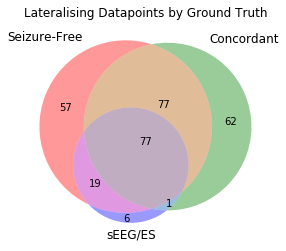

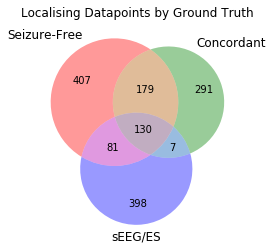

6. Venn diagrams by patient selection priors (study type)


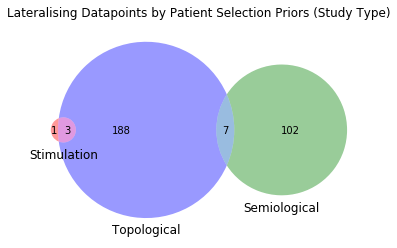

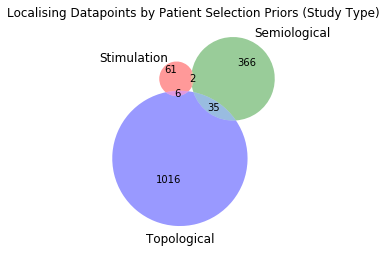

Other criteria:  ['LGi1' 'NMDA-R Abs']
Lateralising Other Total/Exclusives:  2.0 / 2.0
Localising Other Total/Exclusives:  10.0 / 10.0
using option use_semiology_dictionary as taxonomy replacement
..."(?i)Head Version" key definitely exists in semiology_dictionary using REGEX...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
dictionary_key_recursion_2 found values of key
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
searching for nested key...
s

C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project\crosstab\mega_analysis\QUERY_SEMIOLOGY.py:213: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df[col1].str.contains(term, na=False)], sort=False
C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project\crosstab\mega_analysis\QUERY_SEMIOLOGY.py:216: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df[col2].str.contains(term, na=False)], sort=False
C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project\crosstab\mega_analysis\QUERY_SEMIOLOGY.py:213: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df[col1].str.contains(term, na=False)], sort=False
C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project\crosstab\mega_analysis\QUERY_SEMIOLOGY.py:216: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df[col2].str.contains(t

In [2]:
# semiology_term='Dialeptic/loa'
# semiology_term='tonic'
semiology_term='Head Version'

use_semiology_dictionary = True
method = 'non-linear'
# method = 'min_max'
# method = 'linear'
# method = 'chi2-dist'

scale_factor = 15
quantiles = 100
if (method == 'non-linear')|(method=='nonlinear'):
    raw_pt_numbers_string = 'normal QuantileTransformer'
else:
    raw_pt_numbers_string = str(method)
intensity_label = 'Lateralised Intensity. '+str(raw_pt_numbers_string)+'. '+'quantiles: '+str(quantiles)+'. '+'scale: '+str(scale_factor)




df, df_ground_truth, df_study_type = MEGA_ANALYSIS(excel_data = filename)
inspect_result = QUERY_SEMIOLOGY(df, semiology_term=semiology_term, use_semiology_dictionary=use_semiology_dictionary)
# inspect_result
# pivot_result = melt_then_pivot_query(df, inspect_result, semiology_term)


## 2.3 QUERY_LATERALISATION

In [3]:
all_combined_gifs = QUERY_LATERALISATION(inspect_result, df,
                       side_of_symptoms_signs='R',
                       pts_dominant_hemisphere_R_or_L='L')

Lateralisation based on:  67.0  datapoints

No missing Lateralising data points.
Overall Contralateral:  52.0  datapoints
Ipsilateral:  14.0  datapoints
Bilateral/Non-lateralising:  1.0  datapoints. This is not utilised in our analysis/visualisation.
Dominant Hemisphere:  0  datapoints
Non-Dominant Hemisphere:  0  datapoints
0


C:\Users\ali_m\AppData\Local\conda\conda\envs\alienv\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


end of zeroo
1
end of i 1
2
end of i 2
3
some extracted lateralising data exceed the localising data,
for now these are taken as proportion_lateralising=1.0 !
end of i 3
4
end of i 4
5
end of i 5
6
end of i 6
7
end of i 7
8

KeyError. all_gifs= Empty DataFrame
Columns: []
Index: []
CAN NOT FIGURE THIS OUT. WHY EMPTY DATAFRAME? SKIPPED THIS ROW...? USUAL FROM QUERY_LATERALISATION call.

some of the extracted lateralisation have no localisation - for now these are ignored but re-inspect!
row# =  8
9
end of i 9
10
end of i 10
11
end of i 11
12
end of i 12
13
end of i 13
14
15
end of i 15
16
end of i 16
17
end of i 17
18
end of i 18
19
end of i 19
20
end of i 20
21
end of i 21


In [4]:
all_combined_gifs

,Semiology Term,Gif Parcellations,pt #s
0,NaN,32.0,3.0
1,NaN,33.0,30.0
2,NaN,48.0,3.0
3,NaN,49.0,30.0
4,NaN,101.0,0.0
5,NaN,102.0,3.0
6,NaN,103.0,2.0
7,NaN,104.0,0.0
8,NaN,105.0,2.0
9,NaN,106.0,10.0


In [6]:
# final step for lateralisation:

Check distribution of pivot_results, skewnormal & transformation:
Main df, skewnormal & transformation:


C:\Users\ali_m\AppData\Local\conda\conda\envs\alienv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Using sklearn.preprocessing QuantileTransformer, with scale_factor:  15
Using sklearn.preprocessing QuantileTransformer, with scale_factor:  15


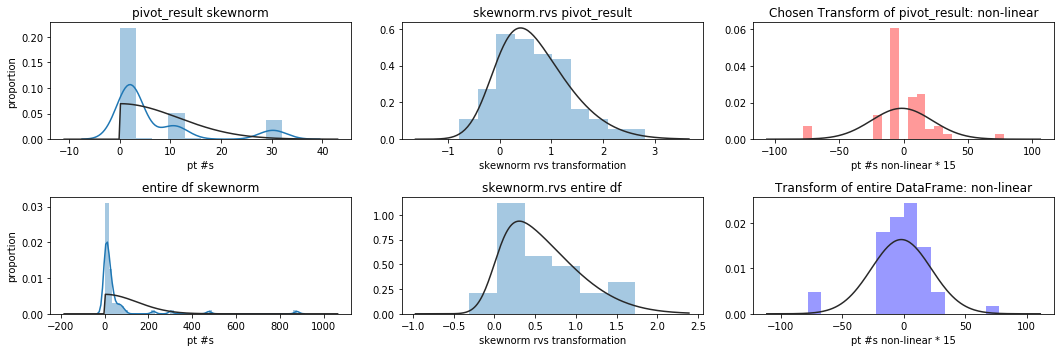

All negative values floored to zero for EpiNav
Intensity might saturate as  77 on its own has intensity value: 77.99006374055129
Intensity might saturate as  95 on its own has intensity value: 77.99006374055129


,Semiology Term,Gif Parcellations,pt #s,Lateralised Intensity. normal QuantileTransformer. quantiles: 100. scale: 15
0,Head Version,32.0,3.0,5.0
1,use_semiology_dictionary=True,33.0,30.0,24.0
2,NaN,48.0,3.0,5.0
3,NaN,49.0,30.0,24.0
4,NaN,101.0,0.0,0.0
5,NaN,102.0,3.0,5.0
6,NaN,103.0,2.0,0.0
7,NaN,104.0,0.0,0.0
8,NaN,105.0,2.0,0.0
9,NaN,106.0,10.0,10.0


In [5]:
all_lateralised_gifs = lateralisation_to_pixel_intensities(all_combined_gifs, df, 
            semiology_term, 
            quantiles, method=method, scale_factor=scale_factor,
            intensity_label=intensity_label,
            use_semiology_dictionary=use_semiology_dictionary)
all_lateralised_gifs

Check distribution of pivot_results, skewnormal & transformation:
Main df, skewnormal & transformation:
Using sklearn.preprocessing MinMaxScaler


C:\Users\ali_m\AppData\Local\conda\conda\envs\alienv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Using sklearn.preprocessing MinMaxScaler


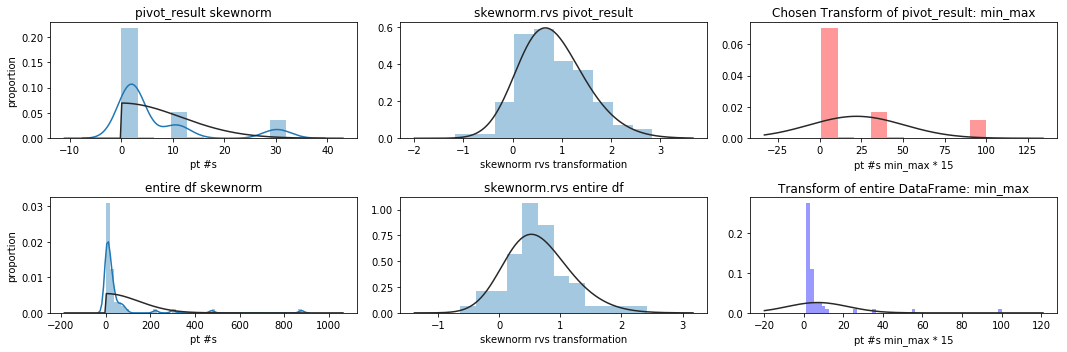

Intensity might saturate as  1 on its own has intensity value: 93.8125
Intensity might saturate as  3 on its own has intensity value: 93.8125
Intensity might saturate as  19 on its own has intensity value: 90.71875
Intensity might saturate as  25 on its own has intensity value: 90.71875
Intensity might saturate as  31 on its own has intensity value: 93.8125
Intensity might saturate as  53 on its own has intensity value: 93.8125
Intensity might saturate as  67 on its own has intensity value: 90.71875
Intensity might saturate as  77 on its own has intensity value: 100.0
Intensity might saturate as  81 on its own has intensity value: 93.8125
Intensity might saturate as  95 on its own has intensity value: 100.0
Intensity might saturate as  97 on its own has intensity value: 96.90625
Intensity might saturate as  101 on its own has intensity value: 96.90625


,Semiology Term,Gif Parcellations,pt #s,Lateralised Intensity. normal QuantileTransformer. quantiles: 100. scale: 15
0,Head Version,32.0,3.0,10.0
1,use_semiology_dictionary=True,33.0,30.0,94.0
2,NaN,48.0,3.0,10.0
3,NaN,49.0,30.0,94.0
4,NaN,101.0,0.0,1.0
5,NaN,102.0,3.0,10.0
6,NaN,103.0,2.0,7.0
7,NaN,104.0,0.0,1.0
8,NaN,105.0,2.0,7.0
9,NaN,106.0,10.0,32.0


In [8]:
# minmaxscaler
method='min_max'

all_lateralised_gifs = lateralisation_to_pixel_intensities(all_combined_gifs, df, 
            semiology_term, 
            quantiles, method=method, scale_factor=scale_factor,
            intensity_label=intensity_label,
            use_semiology_dictionary=use_semiology_dictionary)
all_lateralised_gifs

In [ ]:
pd.options.display.max_rows = 1000
all_lateralised_gifs


In [ ]:
# all_lateralised_gifs.to_excel("D:\\Ali USB Backup\\1 PhD\\tonic_lateralisation_localisation_ontoR.xlsx")

In [ ]:
# done

# chi2 / min_max scaler

In [ ]:
df_or_pivot_result = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,15,3,2,6,8,4,2,34])

In [ ]:
# elif (method == 'non-linear')|(method == 'nonlinear'):

# initialise
pivot_result_intensities = pd.DataFrame().reindex_like(df_or_pivot_result)

method = 'QuantileTransformer'
scale_factor = scale_factor
print('Using sklearn.preprocessing QuantileTransformer, with scale_factor: ', scale_factor)

QT = QuantileTransformer(n_quantiles=quantiles, output_distribution='normal')
QT_array = QT.fit_transform(df_or_pivot_result.values.reshape(-1,1))
# n = 0
# for col in pivot_result_intensities:  # col names are the same
#     pivot_result_intensities.loc[:, col] = scale_factor * QT_array[n]
#     n +=1
# new way to do it faster than above iterating:
QT_array = QT_array.reshape(-1,)
pivot_result_intensities.iloc[0, :] = scale_factor * QT_array

In [ ]:
inspect_result.Lateralising.notnull().sum()

# troubleshoot


In [ ]:
def full_id_vars():
    full_id_cols = ['Reference', 'Relevant Tot Sample', 'Tot Pt included',
                    'Reported Semiology', 'Semiology Category', 'Ground truth description',
                    'Post-op Sz Freedom (Engel Ia, Ib; ILAE 1, 2)',
                'Concordant Neurophys & Imaging (MRI, PET, SPECT)',
                'sEEG and/or ES',
                'Lateralising', 'CL', 'IL', 'BL (Non-lateralising)', 'DomH', 'NonDomH',
                'Localising', 'Reported Localisation',
                    '# tot pt in the paper', '# pt excluded', '# pt sz free post-surg',
                'Spontaneous Semiology (SS)', 'Epilepsy Topology (ET)', 'Cortical Stimulation (CS)', 'Other (e.g. Abs)']
    
    return full_id_cols

full_id_cols = full_id_vars()




inspect_result_lat = inspect_result.loc[inspect_result['Lateralising'].notnull(), :]  # only those with lat
no_rows = inspect_result_lat.shape[0]
full_row = inspect_result_lat.iloc[[0],:]

row = full_row.drop(labels=full_id_cols, axis='columns', inplace=False, errors='ignore')
row = row.dropna(how='all', axis='columns')
row

In [ ]:
one_map = big_map()
row.index.name = 'row'
row.columns.name = 'column'
row_to_one_map = pivot_result_to_one_map(row, one_map, raw_pt_numbers_string='pt #s')

In [ ]:
len([col for col in row if col not in one_map])

In [ ]:
a = inspect_result.iloc[[12, 14, 2],:].dropna(axis='columns', how='all')
a

In [ ]:
b = a.loc[a['DomH'].notnull()|
      a['TL'].notnull()|
          a['FL'].notnull(), ['TL']]
b.isnull().any() == True


In [ ]:
b = a.loc[a['DomH'].notnull()|
      a['TL'].notnull(), ['TL']]
b.isnull()
b.loc[b['TL'].isnull(),:].index

In [ ]:
from crosstab.mega_analysis.group_columns import full_id_vars, lateralisation_vars, anatomical_regions
lat_vars = lateralisation_vars()
print(lat_vars.pop('Lateralising'))

In [ ]:
inspect_result

# pickled data

In [ ]:
def openpickle(path_to_file):
    with open(path_to_file, 'rb') as f:
        data = pickle.load(f)

    return data

In [ ]:
import pickle
def pickledump(obj, path_to_file='D:\\Ali USB Backup\\1 PhD\\', filename='Dialpetic Semiology Dictionary'):
    path_to_file = path_to_file+filename
    with open(path_to_file, 'wb') as f:
        pickle.dump(obj, f)
    

In [ ]:
# pickledump(all_gifs, filename='TEST pivot_result_transformed')